In [8]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, classification_report, roc_curve, auc
)
import matplotlib.pyplot as plt

/tmp/ipython-input-10-2658360795.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({
/tmp/ipython-input-10-2658360795.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].replace({



📌 Model Coefficients & Odds Ratios:
Account length: coef = 0.0905, odds ratio = 1.0947
Area code: coef = -0.1682, odds ratio = 0.8452
International plan: coef = 0.4797, odds ratio = 1.6155
Voice mail plan: coef = -0.2086, odds ratio = 0.8117
Number vmail messages: coef = -0.3239, odds ratio = 0.7233
Total day minutes: coef = 0.4264, odds ratio = 1.5317
Total day calls: coef = 0.0727, odds ratio = 1.0754
Total day charge: coef = 0.4268, odds ratio = 1.5323
Total eve minutes: coef = 0.3582, odds ratio = 1.4308
Total eve calls: coef = 0.2016, odds ratio = 1.2233
Total eve charge: coef = 0.3622, odds ratio = 1.4365
Total night minutes: coef = 0.1995, odds ratio = 1.2208
Total night calls: coef = -0.0469, odds ratio = 0.9542
Total night charge: coef = 0.1994, odds ratio = 1.2206
Total intl minutes: coef = 0.0786, odds ratio = 1.0817
Total intl calls: coef = -0.0822, odds ratio = 0.9211
Total intl charge: coef = 0.1076, odds ratio = 1.1136
Customer service calls: coef = 0.6916, odds ratio =

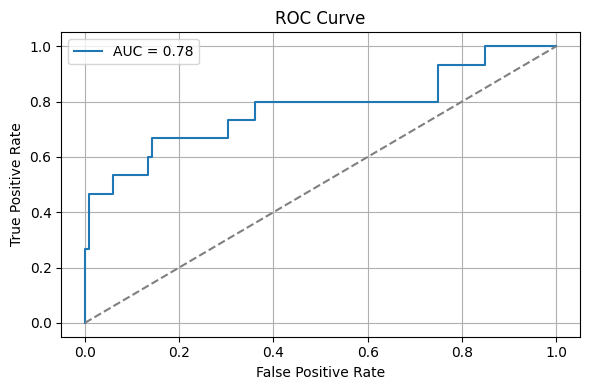

In [10]:
# Step 1: Load the dataset
df = pd.read_csv('/mnt/churn-bigml-20.csv')

# Step 2: Drop irrelevant columns if they exist
columns_to_drop = ['State', 'Area Code', 'Phone']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Step 3: Normalize and convert all object (text) columns to numeric where applicable
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype(str).str.strip().str.lower()
    df[col] = df[col].replace({
        'yes': 1, 'no': 0,
        'true.': 1, 'false.': 0,
        'true': 1, 'false': 0
    })

# Step 4: Convert target column (Churn) if it's still object
df['Churn'] = df['Churn'].astype(int)

# ✅ Confirm all columns are numeric
assert df.select_dtypes(exclude=['int64', 'float64']).shape[1] == 0, "Non-numeric data remains!"

# Step 5: Feature-target split
X = df.drop('Churn', axis=1)
y = df['Churn']

# Step 6: Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Train logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 9: Interpret coefficients and odds ratios
print("\n📌 Model Coefficients & Odds Ratios:")
for feature, coef in zip(X.columns, model.coef_[0]):
    print(f"{feature}: coef = {coef:.4f}, odds ratio = {np.exp(coef):.4f}")

# Step 10: Make predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for ROC

# Step 11: Evaluate the model
print("\n✅ Model Evaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 12: ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()